<a href="https://colab.research.google.com/github/Anspire/Notebooks/blob/master/Blurring_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Blurring

The main goal of blurring is to perform noise reduction.

### Import cv2 and plt

In [0]:
# Imports
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Download images

In [2]:
# Download some images
!wget https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png
!wget http://www.codebind.com/wp-content/uploads/2019/05/lena-1.jpg

--2019-09-21 15:47:05--  https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82829 (81K) [image/png]
Saving to: ‘Noise_salt_and_pepper.png’

Noise_salt_and_pepp 100%[===================>]  80.89K   497KB/s    in 0.2s    

2019-09-21 15:47:06 (497 KB/s) - ‘Noise_salt_and_pepper.png’ saved [82829/82829]

--2019-09-21 15:47:09--  http://www.codebind.com/wp-content/uploads/2019/05/lena-1.jpg
Resolving www.codebind.com (www.codebind.com)... 160.153.162.12
Connecting to www.codebind.com (www.codebind.com)|160.153.162.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘lena-1.jpg’

lena-1.jpg          100%[===================>]  89.66K   170KB/s    in 0.5s    

2019-09-2

### Import and convert image

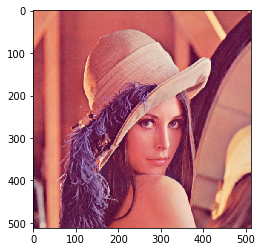

In [3]:
# Import the image and convert to RGB 
img = cv2.imread('lena-1.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(img)
plt.show()

In [0]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p)
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

### Average blurring
Average blurring is taking the average of all the pixel values under the given kernel area and replace the value at the center. For example, suppose we have a kernel with the size of 5X5. We calculate the average of the convoluted outcome and put that result to the center of the given area.

This animation shows how the blur kernel moves along in the original image in order to calculate the color channel values for the blurred image.

![alt text](https://datacarpentry.org/image-processing/fig/05-blur-demo.gif)

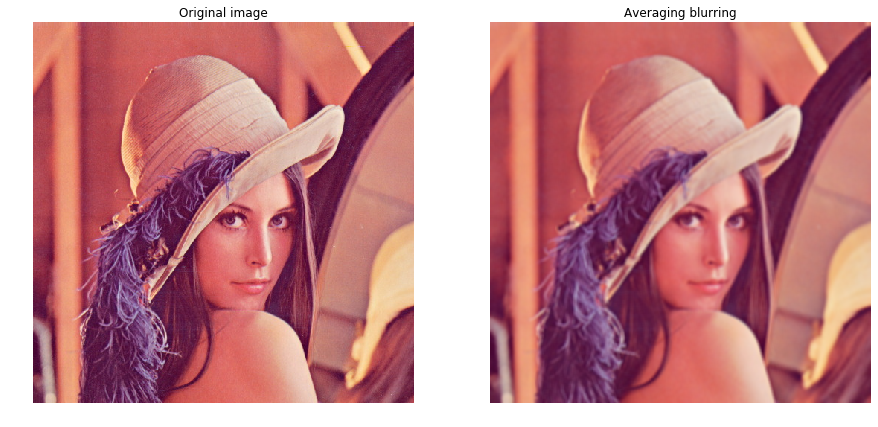

In [5]:
## Average blurring
img_avg_blur = cv2.blur(img, ksize = (5, 5))

# Plot the images
images = [img, img_avg_blur]
titles = ['Original image', 'Averaging blurring']
plot_img(images, titles)

**What if we increase the size of the kernel?**

As the size of filters gets bigger, the pixel values will be normalized more. Therefore we can expect the image to get blurred the more.

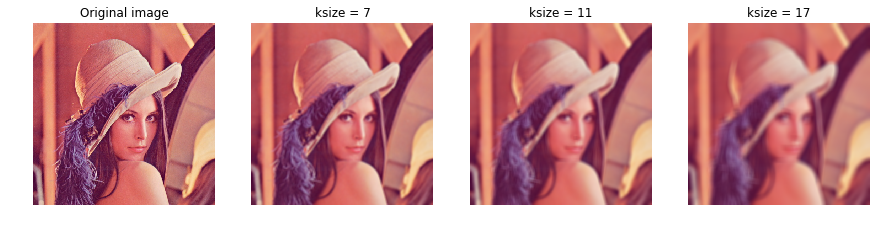

In [6]:
# Plot the image with different kernel sizes

kernels = [7, 11, 17]

titles = ['Original image']
imgs = [img]
for i, s in enumerate(kernels, 1):
    imgs.append(cv2.blur(img, ksize = (s, s)))
    titles.append('ksize = ' + str(s))

plot_img(imgs, titles)

### Median blurring
Median blurring is the same with average blurring except that it uses the median value instead of the average.

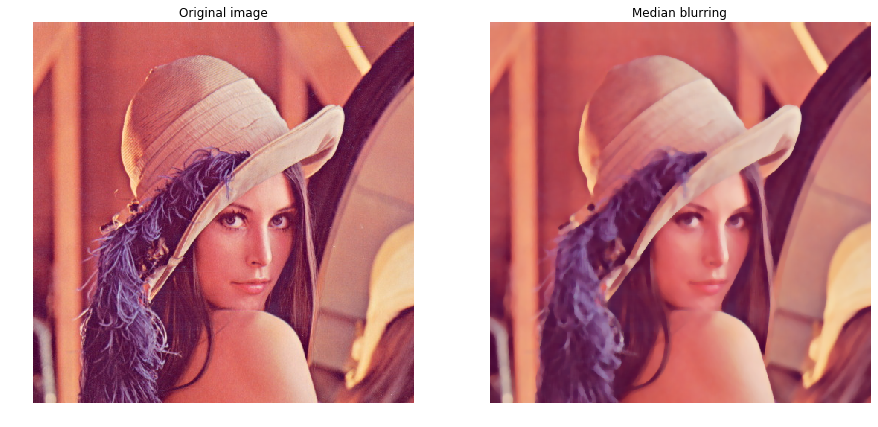

In [7]:
# Median blurring
img_med_blur = cv2.medianBlur(img, ksize = 7)

# Plot the images
images = [img, img_med_blur]
titles = ['Original image', 'Median blurring']
plot_img(images, titles)

## Gaussian blurring
Gaussian blurring is nothing but using the kernel whose values have a Gaussian distribution. The values are generated by a Gaussian function so it requires a sigma value for its parameter. As you can see the image above, the values of the kernel go higher near the center and go smaller near the corner. It’s good to apply this method to the noises that have a normal distribution such as white noise.

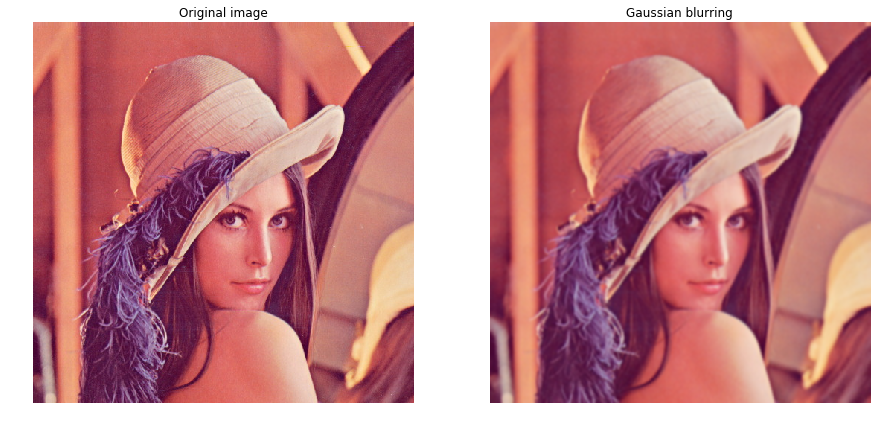

In [8]:
# Gaussian blurring
img_gaus_blur = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)

# Plot the images
images = [img, img_gaus_blur]
titles = ['Original image', 'Gaussian blurring']
plot_img(images, titles)

### Bilateral Filtering
Bilateral Filtering is an advanced version of Gaussian blurring. Blurring produces not only dissolving noises but also smoothing edges. And bilateral filter can keep edges sharp while removing noises. It uses Gaussian-distributed values but takes both distance and the pixel value differences into account. Therefore it requires sigmaSpace and sigmaColor for the parameters.

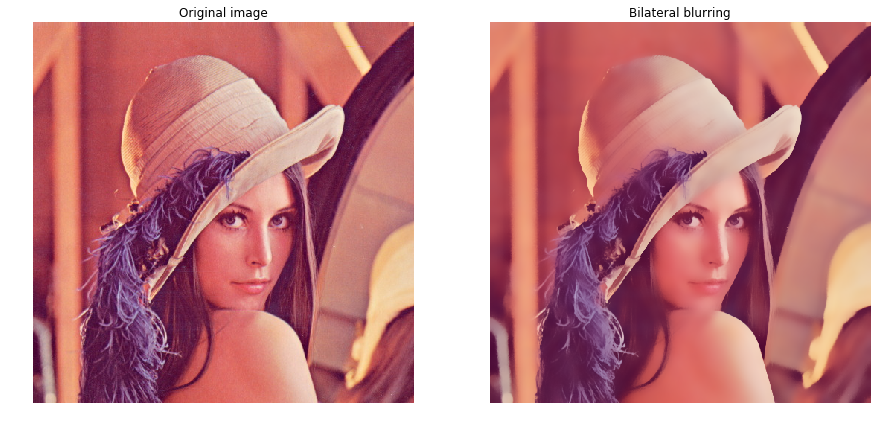

In [9]:
# Bilateral blurring
img_bilat_blur = cv2.bilateralFilter(img, 17, sigmaSpace = 75, sigmaColor =75)

# Plot the images
images = [img, img_bilat_blur]
titles = ['Original image', 'Bilateral blurring']
plot_img(images, titles)

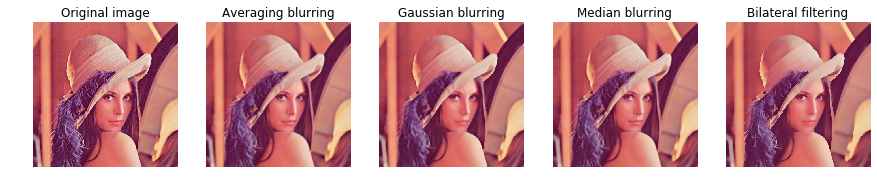

In [10]:
# Plot the images
images = [img, img_avg_blur, img_med_blur, img_gaus_blur, img_bilat_blur]
titles = ['Original image', 'Averaging blurring', 'Gaussian blurring', 'Median blurring', 'Bilateral filtering']
plot_img(images, titles)
